In [1]:
cd D:\Users\Niels\Documents\Machine learning\python\ING

D:\Users\Niels\Documents\Machine learning\python\ING


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#data = pd.read_csv("train - subsample.csv")
data = pd.read_csv("train.csv")
print(data.head())
data_orig = data
print(data["bankrupt"].sum())
print("Number of lines: {} Default probability: {}".format(len(data.index), data["bankrupt"].sum()/len(data.index)))

   num_employees country                                      industry_desc  \
0          50253      CN  Nonscheduled Chartered Freight Air Transportat...   
1           1847      CN                 Offices of Real Estate Appraisers    
2          16184      CN                 Nuclear Electric Power Generation    
3             25      TR                   Ready-Mix Concrete Manufacturing   
4           4968      CN  Motor Vehicle Electrical and Electronic Equipm...   

   A_score  B_score  C_score  D_score  revenue2014  revenue2015  revenue2016  \
0      3.0      3.0      3.0      3.0          108          396          629   
1      2.0      2.0      4.0      NaN          956          647          513   
2      3.0      4.0      NaN      4.0          901         1930         3022   
3      2.0      2.0      2.0      NaN        11267         7787         6598   
4      NaN      3.0      2.0      5.0         2481         4512         9195   

   bankrupt  
0         0  
1         0  
2 

11


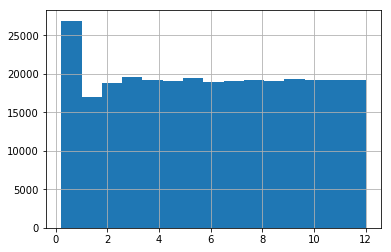

In [7]:
# Explore distribution of company size (number of employees)

# hist = data["num_employees"].hist(bins=10)
min_employees = np.min(data["num_employees"].values)
data["log_num_employees"] = data["num_employees"].apply(lambda x: np.log(x - (min_employees - 1 - 0.25)))
print(min_employees)
hist = data["log_num_employees"].hist(bins=15)
hist.plot()
plt.show()

In [8]:
# Explore countries.
# Get the list of countries with number of occurrences
countries = pd.value_counts(data["country"])
# Loop through the countries
for idx, total in countries.iteritems():
    subdata = data.loc[data["country"] == idx][["bankrupt"]]
    # Determine the number of bankruptcies and calculate default probability
    counts = pd.value_counts(subdata["bankrupt"]).multiply(1./total)
    print("Country: {}  Observations: {}  Default prob: {}".format(idx, total, counts.values[-1]))

Country: NL  Observations: 59038  Default prob: 0.11177546664859919
Country: CN  Observations: 58733  Default prob: 0.09892224132940595
Country: TR  Observations: 58648  Default prob: 0.08644796071477287
Country: US  Observations: 58395  Default prob: 0.06116962068670263
Country: EN  Observations: 58308  Default prob: 0.04453934280030185


Number of Industries: 620 Mean No. Occurrences: 472.7774193548387 StDev: 22.220414570864325


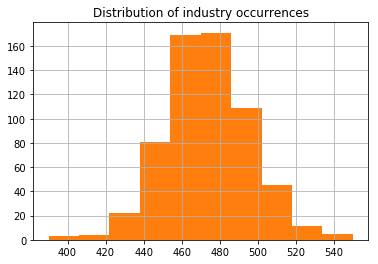

In [15]:
# Explore industries
# Get the list of industries with number of occurrences
industries = pd.value_counts(data["industry_desc"])
n_industries = industries.size
n_data = len(data.index)
print("Number of Industries: {} Mean No. Occurrences: {} StDev: {}".format(n_industries, industries.mean(), industries.std()))

# Histogram of industry occurrences
histInd = industries.hist()
histInd.plot()
plt.title("Distribution of industry occurrences") 
plt.show()

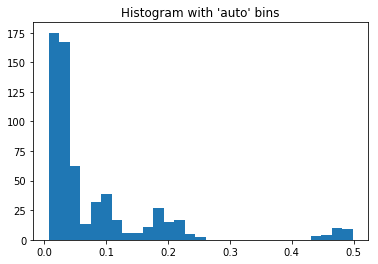

In [8]:
# Loop through the industries. Collect default probability
default_ind =[]
for idx, total in industries.iteritems():
    subdata = data.loc[data["industry_desc"] == idx][["bankrupt"]]
    # Determine the number of bankruptcies and calculate default probability
    default_prob = 0
    if total > 0:
        counts = pd.value_counts(subdata["bankrupt"]).multiply(1./total)
        default_prob = counts.values[-1]
    #print("Industry: {}  Observations: {}  Default prob: {}".format(idx, total, default_prob))
    default_ind.append(default_prob)
# Distribution of default probabilities by industry
plt.hist(default_ind, bins='auto')  # arguments are passed to np.histogram
plt.title("Distribution of default prob")
plt.show()

[ 0.          0.          0.12226169  0.11096621  0.09827581  0.08449757
  0.07629075  0.07178156  0.06618265  0.06289829  0.06666667]
[ 0.          0.55555556  1.11111111  1.66666667  2.22222222  2.77777778
  3.33333333  3.88888889  4.44444444  5.        ]


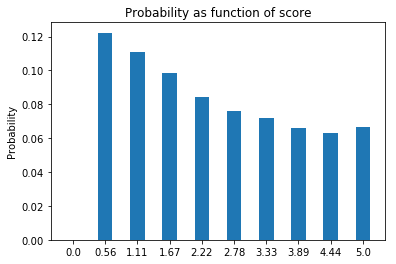

In [31]:
# Expore scores. First look at aggregate scores. Then look per score.
scores = data[["A_score", "B_score", "C_score", "D_score"]]
mean_scores = scores.mean(axis=1).to_frame()
mean_scores.columns = ["score"]
mean_scores = mean_scores.join(data["bankrupt"])
#print(mean_scores.head(20))

bins = np.linspace(0.0, 5., 10)
bin_numbers = np.digitize(mean_scores["score"].values, bins, right=True)
#plt.hist(bin_numbers, bins='auto')  # arguments are passed to np.histogram
#plt.title("Histogram with 'auto' bins")
#plt.show()

score_total = np.zeros(np.max(bin_numbers) + 1)
score_bankruptcy = np.zeros(np.max(bin_numbers) + 1)
bankruptcy_values = mean_scores["bankrupt"].values
for i, v in enumerate(bin_numbers):
    score_total[v] += 1
    score_bankruptcy[v] += bankruptcy_values[i]
bankruptcy_prob = np.zeros(len(score_total))
for i in range(len(score_total)):
    if score_total[i] > 0:
        bankruptcy_prob[i] = score_bankruptcy[i]/score_total[i]

#print(score_total)
#print(score_bankruptcy)
print(bankruptcy_prob)
print(bins)

plt.bar(bins, bankruptcy_prob[1:], align='center', width=0.25)
plt.xticks(bins, np.round(bins,2))
plt.ylabel('Probability')
plt.title('Probability as function of score')
 
plt.show()

[ 0.          0.11019757  0.08716498  0.07735454  0.07224867  0.06249052
  0.08063034]
[ 0.  1.  2.  3.  4.  5.]


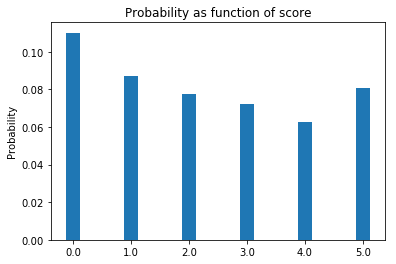

[ 0.          0.098794    0.08566633  0.07418267  0.06712204  0.06111141
  0.08099348]
[ 0.  1.  2.  3.  4.  5.]


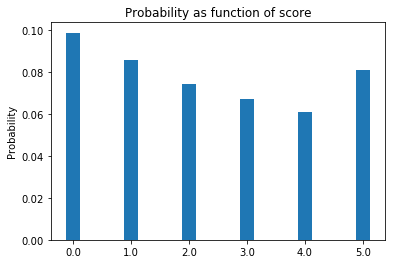

[ 0.          0.07996809  0.07965591  0.07986285  0.08340766  0.08041613
  0.08140088]
[ 0.  1.  2.  3.  4.  5.]


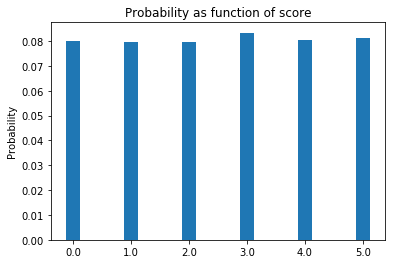

[ 0.          0.098794    0.08566633  0.07418267  0.06712204  0.06111141
  0.08099348]
[ 0.  1.  2.  3.  4.  5.]


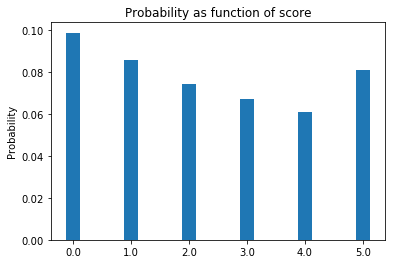

In [33]:
# Expore scores. First look at aggregate scores. Then look per score.
score_labels = ["A_score","B_score","C_score","B_score"]
for score in score_labels:
    mean_scores = data[[score,"bankrupt"]]
    #print(mean_scores.head(20))

    bins = np.linspace(0.0, 5., 6)
    bin_numbers = np.digitize(mean_scores[score].values, bins, right=True)
    #plt.hist(bin_numbers, bins='auto')  # arguments are passed to np.histogram
    #plt.title("Histogram with 'auto' bins")
    #plt.show()

    score_total = np.zeros(np.max(bin_numbers) + 1)
    score_bankruptcy = np.zeros(np.max(bin_numbers) + 1)
    bankruptcy_values = mean_scores["bankrupt"].values
    for i, v in enumerate(bin_numbers):
        score_total[v] += 1
        score_bankruptcy[v] += bankruptcy_values[i]
    bankruptcy_prob = np.zeros(len(score_total))
    for i in range(len(score_total)):
        if score_total[i] > 0:
            bankruptcy_prob[i] = score_bankruptcy[i]/score_total[i]

    #print(score_total)
    #print(score_bankruptcy)
    print(bankruptcy_prob)
    print(bins)

    plt.bar(bins, bankruptcy_prob[1:], align='center', width=0.25)
    plt.xticks(bins, np.round(bins,2))
    plt.ylabel('Probability')
    plt.title('Probability as function of score')
 
    plt.show()

Number of Industries: 620 Mean No. Occurrences: 472.7774193548387 StDev: 22.220414570864325
       score  bankrupt
0   3.000000         0
1   2.666667         0
2   3.666667         0
3   2.000000         0
4   3.333333         1
5   1.750000         0
6   3.000000         0
7   1.666667         0
8   3.750000         0
9   4.500000         0
10  2.000000         0
11  2.000000         0
12  3.500000         0
13  3.333333         0
14  3.250000         0
15  2.000000         0
16  2.250000         0
17  2.500000         0
18  4.250000         0
19  2.500000         0
[  0.00000000e+00   0.00000000e+00   3.37800000e+03   1.76360000e+04
   3.03330000e+04   7.58720000e+04   7.01920000e+04   4.43150000e+04
   3.56740000e+04   1.56920000e+04   3.00000000e+01]
[  0.00000000e+00   0.00000000e+00   4.13000000e+02   1.95700000e+03
   2.98100000e+03   6.41100000e+03   5.35500000e+03   3.18100000e+03
   2.36100000e+03   9.87000000e+02   2.00000000e+00]
[ 0.          0.          0.12226169  0.110

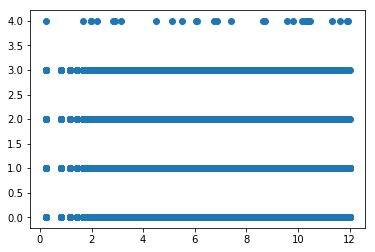

In [ ]:
# Explore missing data

# Total number of missing data per score
scores = data[["A_score", "B_score", "C_score", "D_score"]]
missing_per_column = pd.DataFrame(scores.isnull().sum(), columns=["Count"])
print(missing_per_column)

# Missing data per line. Sum number of missing data
missing_per_row = pd.DataFrame(scores.isnull().sum(axis=1), columns=["missing_count"])
data = data.join(missing_per_row)
print(pd.value_counts(missing_per_row["missing_count"]).values)

# Distribution of missing data as a function of the number of employees (size of company)

bins = [1., 1.7, 2.8, 4, 5.5]
binned = pd.DataFrame(np.searchsorted(bins, data["log_num_employees"].values), columns=["num_employee_label"])
data = data.join(binned)

for i in range(4):
    subdata = data.loc[data["num_employee_label"] == i + 1][["num_employee_label", "missing_count"]]
    print(pd.value_counts(subdata["missing_count"]).values * 100 / len(subdata.index))
exit()


print(data.loc[data["num_employee_label"] == 1][["num_employee_label","missing_count"]])


# print(pd.cut(missing_per_row_data, bins, labels=bins[:-1]))

fig, ax = plt.subplots()
ax = plt.scatter(data["log_num_employees"].values, data["missing_count"].values)
plt.show()